Importing basic libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

Uploading file named 'AUDUSD.csv'

In [ ]:
from google.colab import files
upload=files.upload() 

Saving AUDUSD.csv to AUDUSD.csv


Top 5 datapoints look

In [ ]:
AUDUSD=pd.read_csv('/content/AUDUSD.csv')
AUDUSD.head()  

,Time (UTC),Open,High,Low,Close,Volume
0,2010.01.01 02:00:00,0.89748,0.89759,0.89741,0.89747,7951.85
1,2010.01.01 06:00:00,0.89747,0.89763,0.89739,0.89754,18505.45
2,2010.01.01 10:00:00,0.89755,0.89763,0.89746,0.89750,15265.53
3,2010.01.01 14:00:00,0.89753,0.89769,0.89746,0.89753,16587.97
4,2010.01.01 18:00:00,0.89755,0.89765,0.89738,0.89738,7615.19


Last five data-point view

In [ ]:
AUDUSD.tail()

,Time (UTC),Open,High,Low,Close,Volume
15895,2020.03.12 05:00:00,0.64578,0.64638,0.64352,0.64362,31186.71
15896,2020.03.12 09:00:00,0.64362,0.64365,0.63481,0.63487,36624.52
15897,2020.03.12 13:00:00,0.63487,0.63678,0.62669,0.63544,72771.41
15898,2020.03.12 17:00:00,0.63543,0.63866,0.62136,0.62377,55018.52
15899,2020.03.12 21:00:00,0.62378,0.63186,0.62336,0.62899,27747.49


Data shape

In [ ]:
AUDUSD.shape

(15900, 6)

In [ ]:
print('Missing Values:')
for i in AUDUSD.columns:
  print('{}='.format(i),AUDUSD[i].isnull().sum())

Missing Values:
Time (UTC)= 0
Open= 0
High= 0
Low= 0
Close= 0
Volume = 0


**First Study Period:**

In research paper dataset has 6-years in which 3 year is for training and 6-month for validation and test set. And remainig year for next study period study get used. So here we have 10 years and 3  month. Let's split our data into 6 year and 1-year for validation and 1-year test. Remaining use for second study for period.

**Second Study Peiod**

So in second period author moves next one more year by leaving the first year. And remaining process like above one and so on.

**Third Study Period**
Similar for third study period shifiting to one more head and leaving the first year of second study period data. This we cover whole year by dividing into three study period.


**Training Process:**
Author provide three diffrent input feature:
Type I Input Feature, Type II Input Feature, Type III Input Feature.

*Type I Input Feature:* It consist only one input feature and train the midel.

*Type II Input Feature:* It consist two one input feature and train the midel.

*Type III Input Feature:* It consist more than one input feature and train the midel.

By training the model and will try to get minimize weights and transfer to it another model to check performance level. All this method because in less data model can be overfitted and we have to avoid it. So we are dealing with higer dimesntional data .

Here we see only for one varible and build the model. It takes some times to run . By runining the below code we run all study period. Here our target is to predict the **'Close'** value of stocks.

**Definig the model proposed by author.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense,Input,Dropout
from tensorflow.keras.models import Sequential,Model

def research_model(units,drop_value,trainX,time_steps):    #This is model proposed in research paper and units=16 etc.
  data_input=Input(shape=(time_steps,trainX.shape[2]))
  first_lstm=LSTM(units,return_sequences=True)(data_input)
  first_dropout=Dropout(drop_value)(first_lstm)
  second_lstm=LSTM(units)(first_dropout)
  second_dropout=Dropout(drop_value)(second_lstm)
  dense1=Dense(20,activation='sigmoid',kernel_initializer='random_normal',bias_initializer='random_normal')(second_dropout)
  third_dropout=Dropout(drop_value)(dense1)
  output=Dense(1,activation='sigmoid',kernel_initializer='random_normal',bias_initializer='random_normal')(third_dropout)
  model=Model(data_input,output)
  return model

**This function will help to create the dataset into train and test.**

In [ ]:

def create_dataset(data,time_steps):
    dataX=[]
    dataY=[]
    
    X=[[data[j+i] for j in range(time_steps)] for i in range(len(data)-time_steps+1)]
    dataX=np.array(X)
    
    for i in range(len(data)-time_steps+1):
        dataY.append([data.tolist()[i]])
    return dataX,dataY    



**This is our time_steps i.e.after also decide the number of samples.**

In [ ]:
time_steps=1 

**Three Study Period**

This is our all study period from year 2010 to 2019. It splits into three dataset and worked.

In [ ]:
all_study_period=[
                  (AUDUSD[AUDUSD.columns[0]] <= '2018.01.01 06:00:00'),
                  ((AUDUSD[AUDUSD.columns[0]] >= '2011.01.01 06:00:00') & (AUDUSD[AUDUSD.columns[0]] <= '2019.01.01 06:00:00')),
                  (AUDUSD[AUDUSD.columns[0]] >= '2012.0101 06:00:00') 
]

Defining the empty model to save our all the models that we trained.

In [ ]:
empty_model=[]
for i in range(3):
  empty_model.append('model{}'.format(i))

Below code is for Type I Input Feature. Means it takes only one feature vector.

*Note:* Running the below code takes some time to cover all the study period.

1- study Period And Data
                Time (UTC)     Open     High      Low    Close   Volume 
0      2010.01.01 02:00:00  0.89748  0.89759  0.89741  0.89747   7951.85
1      2010.01.01 06:00:00  0.89747  0.89763  0.89739  0.89754  18505.45
2      2010.01.01 10:00:00  0.89755  0.89763  0.89746  0.89750  15265.53
3      2010.01.01 14:00:00  0.89753  0.89769  0.89746  0.89753  16587.97
4      2010.01.01 18:00:00  0.89755  0.89765  0.89738  0.89738   7615.19
...                    ...      ...      ...      ...      ...       ...
12474  2017.12.29 02:00:00  0.77942  0.78037  0.77906  0.78037   7490.80
12475  2017.12.29 06:00:00  0.78034  0.78146  0.77890  0.78139  13573.86
12476  2017.12.29 10:00:00  0.78138  0.78253  0.78086  0.78100  11050.28
12477  2017.12.29 14:00:00  0.78098  0.78252  0.78066  0.78125  15078.95
12478  2017.12.29 18:00:00  0.78124  0.78208  0.78002  0.78208   9624.06

[12479 rows x 6 columns]
Processing data.....................................
[0.89747 0.89754 0.8

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


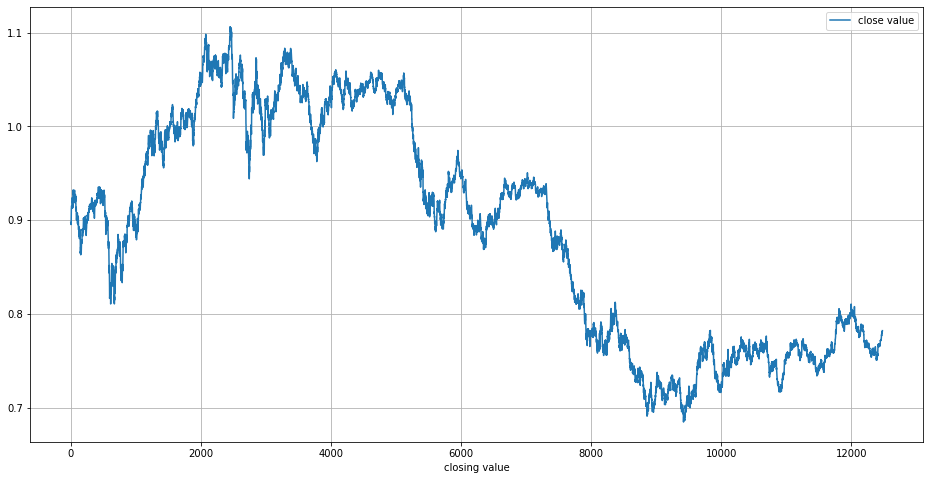

Training and validation spliting...................................
Training and validation split completed................................................
Test data prepararion..........................
Test data preparation completed...................................
Calling Reseach model
Research model is running it may takes time please wait.........................
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 50)             10400     
_________________________________________________________________
dropout (Dropout)            (None, 1, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


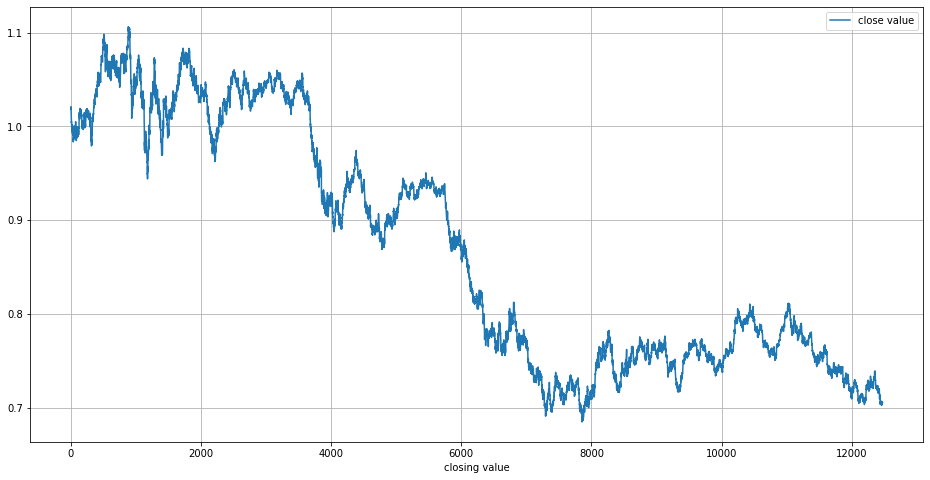

Training and validation spliting...................................
Training and validation split completed................................................
Test data prepararion..........................
Test data preparation completed...................................
Calling Reseach model
Research model is running it may takes time please wait.........................
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_______________

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


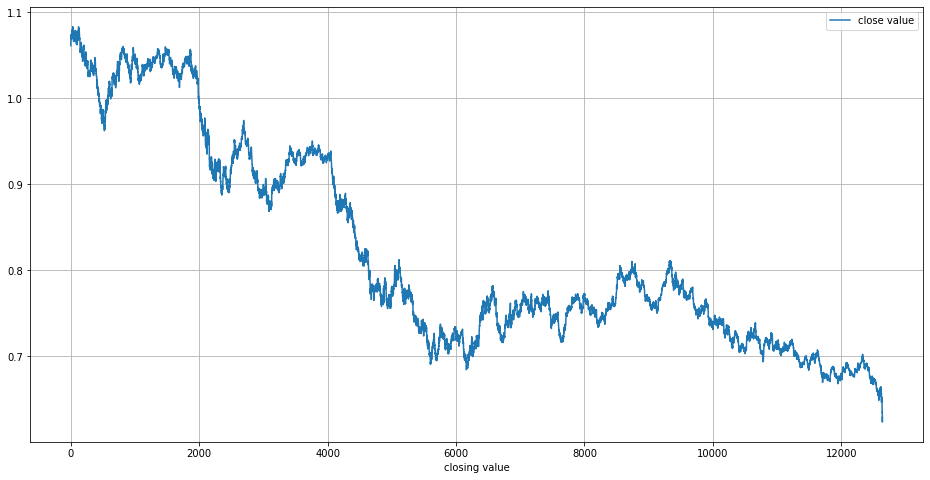

Training and validation spliting...................................
Training and validation split completed................................................
Test data prepararion..........................
Test data preparation completed...................................
Calling Reseach model
Research model is running it may takes time please wait.........................
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_______________

In [ ]:

for i in range(3):
  print('=============================================================================================================')
  print('{}- study Period And Data'.format(i+1))

  study_period=(AUDUSD.loc[all_study_period[i]])
  print(study_period)
  
  print('Processing data.....................................')
  study_period.drop(['Time (UTC)'],axis=1,inplace=True)
  study_period.drop(['Volume '],axis=1,inplace=True)

  type_1_close_feature=study_period['Close'].values
  print(type_1_close_feature)
  print('Data processing completed.')

  print('{} study period graph ploting '.format(i+1))
  plt.figure(figsize=(16,8))
  plt.plot(type_1_close_feature)
  plt.xlabel('closing value')
  plt.legend(['close value'])
  plt.grid()
  plt.show()

  print('Training and validation spliting...................................')

  first_period_trainX,first_period_trainY=create_dataset(type_1_close_feature,time_steps)
  first_period_trainX

  val_size=study_period.index[0]+9326
  val_last_size=val_size+1595

  train, val = first_period_trainX[study_period.index[0]:val_size,:], first_period_trainX[val_size:val_last_size,:]

  trainX, trainY = create_dataset(train,time_steps )

  valX, valY = create_dataset(val, time_steps)
  print('Training and validation split completed................................................')

  print('Test data prepararion..........................')

  test=first_period_trainX[val_last_size:study_period.index[-1]:]
  testX, testY = create_dataset(test, time_steps)

  print('Test data preparation completed...................................')

  print('Calling Reseach model')
  print('Research model is running it may takes time please wait.........................')

  empty_model[i]=research_model(50,0.2,trainX,time_steps)
  empty_model[i].summary()

  empty_model[i].compile(loss='mse',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001))
  empty_model[i].fit(np.array(first_period_trainX),np.array(first_period_trainY),validation_data=(np.array(valX),np.array(valY)),batch_size=10,epochs=1)
  
  print('Calculating the value of RMSE')
  #rmse=np.sqrt(np.mean(((empty_model[i].predict(testX)- testY)**2)))
  #print('{}-study period RMSE='.format(i+1),rmse)



This is only univariate analysis. After that remainig process is same as in below code after multivariate analysis. 

**Note:** In reserach paper there different combinaion of feature selected on the basis of cosine silmiliarity.

But we concentrate more on including all the feature variable. We can also try different combination of feature vector and can see the model performance. But here we are seeing all. Again threes study period. So it is multivariate.

**Note:Below code run well and smoothly**

In [ ]:

all_study_period=[
                  (AUDUSD[AUDUSD.columns[0]] <= '2018.01.01 06:00:00'),
                  ((AUDUSD[AUDUSD.columns[0]] >= '2011.01.01 06:00:00') & (AUDUSD[AUDUSD.columns[0]] <= '2019.01.01 06:00:00')),
                  (AUDUSD[AUDUSD.columns[0]] >= '2012.0101 06:00:00') 
]


higher_empty_model=[]
for i in range(3):
  higher_empty_model.append('model{}'.format(i))
higher_empty_model

['model0', 'model1', 'model2']

In [ ]:
time_steps=1    #Time steps

#Multivariate data preparation
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

This is second way by slightly modification:

In [ ]:
#Research paper based model 
def model1(units,time_steps):
  encoder_input_1=Input(shape=(time_steps,3))
  encoder_lstm_1=LSTM(units,return_sequences=True)(encoder_input_1)
  decoder_lstm_1=LSTM(time_steps)(encoder_lstm_1)
  first_dropout=Dropout(0.2)(decoder_lstm_1)
  decoder_time=Dense(20,activation='sigmoid',kernel_initializer='random_normal',bias_initializer='random_normal')(first_dropout)
  decoder_dense=Dense(1,activation='sigmoid',kernel_initializer='random_normal',bias_initializer='random_normal')(decoder_time)
  return Model(encoder_input_1,decoder_dense)


# Slightly modification : My method for improving accuracy
def model2(units,time_steps):
  encoder_input_1=Input(shape=(time_steps,3))
  encoder_lstm_1=LSTM(units,return_sequences=True)(encoder_input_1)
  decoder_lstm_1=LSTM(time_steps)(encoder_lstm_1)
  decoder_time=Dense(20)(decoder_lstm_1)
  decoder_dense=Dense(1)(decoder_time)
  return Model(encoder_input_1,decoder_dense)


**Higher dimensional model.**

It will covee all study preriod and will give best model. It runs very fast compare to previous one.

1- study Period And Data
                Time (UTC)     Open     High      Low    Close   Volume 
0      2010.01.01 02:00:00  0.89748  0.89759  0.89741  0.89747   7951.85
1      2010.01.01 06:00:00  0.89747  0.89763  0.89739  0.89754  18505.45
2      2010.01.01 10:00:00  0.89755  0.89763  0.89746  0.89750  15265.53
3      2010.01.01 14:00:00  0.89753  0.89769  0.89746  0.89753  16587.97
4      2010.01.01 18:00:00  0.89755  0.89765  0.89738  0.89738   7615.19
...                    ...      ...      ...      ...      ...       ...
12474  2017.12.29 02:00:00  0.77942  0.78037  0.77906  0.78037   7490.80
12475  2017.12.29 06:00:00  0.78034  0.78146  0.77890  0.78139  13573.86
12476  2017.12.29 10:00:00  0.78138  0.78253  0.78086  0.78100  11050.28
12477  2017.12.29 14:00:00  0.78098  0.78252  0.78066  0.78125  15078.95
12478  2017.12.29 18:00:00  0.78124  0.78208  0.78002  0.78208   9624.06

[12479 rows x 6 columns]

 Processing data........................................................

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[0.89748 0.89759 0.89741 0.89747]
 [0.89747 0.89763 0.89739 0.89754]
 [0.89755 0.89763 0.89746 0.8975 ]
 ...
 [0.78138 0.78253 0.78086 0.781  ]
 [0.78098 0.78252 0.78066 0.78125]
 [0.78124 0.78208 0.78002 0.78208]]

 Data processing completed......................................... 


 Splitting dataset into train test and validation............................ 

Train size= 9357
Test size= 1998
Train_X data= 
 [[[0.89748 0.89759 0.89741]
  [0.89747 0.89763 0.89739]
  [0.89755 0.89763 0.89746]]

 [[0.89747 0.89763 0.89739]
  [0.89755 0.89763 0.89746]
  [0.89753 0.89769 0.89746]]

 [[0.89755 0.89763 0.89746]
  [0.89753 0.89769 0.89746]
  [0.89755 0.89765 0.89738]]

 [[0.89753 0.89769 0.89746]
  [0.89755 0.89765 0.89738]
  [0.89847 0.90001 0.89397]]

 [[0.89755 0.89765 0.89738]
  [0.89847 0.90001 0.89397]
  [0.8952  0.89864 0.89504]]

 [[0.89847 0.90001 0.89397]
  [0.8952  0.89864 0.89504]
  [0.89789 0.90562 0.89687]]

 [[0.8952  0.89864 0.89504]
  [0.89789 0.90562 0.89687]
  [0.90554 

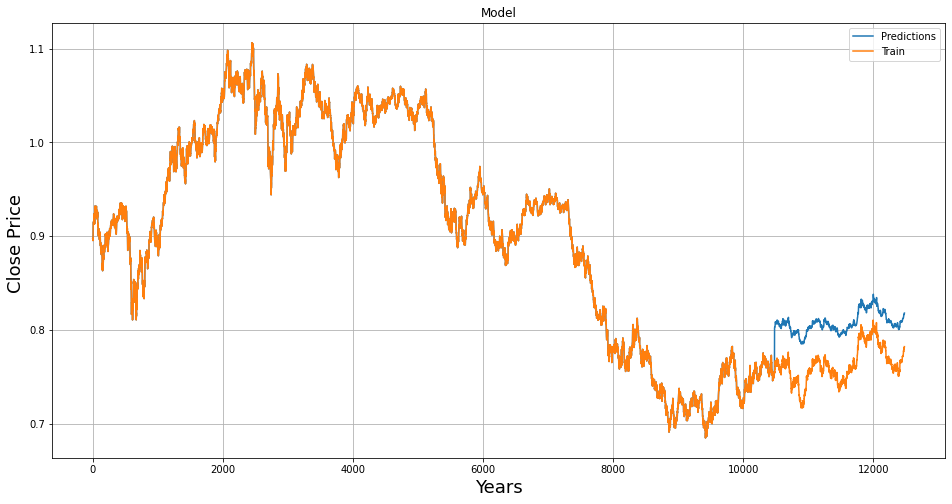

2- study Period And Data
                Time (UTC)     Open     High      Low    Close     Volume 
1565   2011.01.02 22:00:00  1.02070  1.02267  1.01812  1.01833   9060.8653
1566   2011.01.03 02:00:00  1.01833  1.02115  1.01827  1.02066   6375.1839
1567   2011.01.03 06:00:00  1.02068  1.02122  1.01865  1.01981  11705.1417
1568   2011.01.03 10:00:00  1.01981  1.02136  1.01794  1.01822  11618.2350
1569   2011.01.03 14:00:00  1.01818  1.02119  1.01744  1.02057  20359.2400
...                    ...      ...      ...      ...      ...         ...
14031  2018.12.31 02:00:00  0.70527  0.70681  0.70509  0.70593  17859.0200
14032  2018.12.31 06:00:00  0.70595  0.70721  0.70575  0.70614  18597.6800
14033  2018.12.31 10:00:00  0.70614  0.70663  0.70470  0.70497  17829.9700
14034  2018.12.31 14:00:00  0.70496  0.70569  0.70334  0.70437  27766.4900
14035  2018.12.31 18:00:00  0.70436  0.70628  0.70409  0.70534  11124.5200

[12471 rows x 6 columns]

 Processing data................................

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[1.0207  1.02267 1.01812 1.01833]
 [1.01833 1.02115 1.01827 1.02066]
 [1.02068 1.02122 1.01865 1.01981]
 ...
 [0.70614 0.70663 0.7047  0.70497]
 [0.70496 0.70569 0.70334 0.70437]
 [0.70436 0.70628 0.70409 0.70534]]

 Data processing completed......................................... 


 Splitting dataset into train test and validation............................ 

Train size= 9351
Test size= 1996
Train_X data= 
 [[[1.0207  1.02267 1.01812]
  [1.01833 1.02115 1.01827]
  [1.02068 1.02122 1.01865]]

 [[1.01833 1.02115 1.01827]
  [1.02068 1.02122 1.01865]
  [1.01981 1.02136 1.01794]]

 [[1.02068 1.02122 1.01865]
  [1.01981 1.02136 1.01794]
  [1.01818 1.02119 1.01744]]

 [[1.01981 1.02136 1.01794]
  [1.01818 1.02119 1.01744]
  [1.02056 1.02089 1.01582]]

 [[1.01818 1.02119 1.01744]
  [1.02056 1.02089 1.01582]
  [1.01687 1.01716 1.01242]]

 [[1.02056 1.02089 1.01582]
  [1.01687 1.01716 1.01242]
  [1.01363 1.01496 1.0092 ]]

 [[1.01687 1.01716 1.01242]
  [1.01363 1.01496 1.0092 ]
  [1.0099  

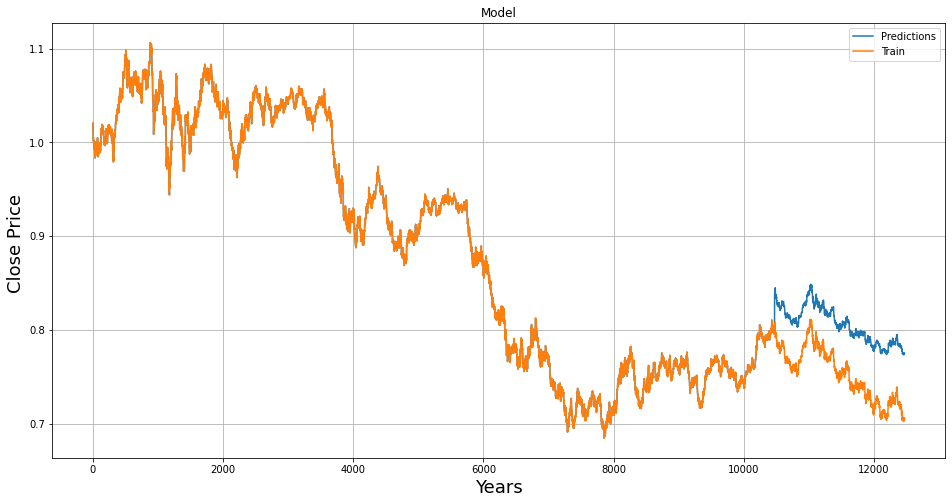

3- study Period And Data
                Time (UTC)     Open     High      Low    Close   Volume 
3258   2012.02.01 02:00:00  1.06262  1.06395  1.06030  1.06138  29121.76
3259   2012.02.01 06:00:00  1.06141  1.06821  1.05700  1.06765  46793.65
3260   2012.02.01 10:00:00  1.06761  1.07155  1.06589  1.07028  40606.21
3261   2012.02.01 14:00:00  1.07028  1.07409  1.07003  1.07218  52258.97
3262   2012.02.01 18:00:00  1.07218  1.07316  1.06942  1.07055  33528.10
...                    ...      ...      ...      ...      ...       ...
15895  2020.03.12 05:00:00  0.64578  0.64638  0.64352  0.64362  31186.71
15896  2020.03.12 09:00:00  0.64362  0.64365  0.63481  0.63487  36624.52
15897  2020.03.12 13:00:00  0.63487  0.63678  0.62669  0.63544  72771.41
15898  2020.03.12 17:00:00  0.63543  0.63866  0.62136  0.62377  55018.52
15899  2020.03.12 21:00:00  0.62378  0.63186  0.62336  0.62899  27747.49

[12642 rows x 6 columns]

 Processing data........................................................

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[1.06262 1.06395 1.0603  1.06138]
 [1.06141 1.06821 1.057   1.06765]
 [1.06761 1.07155 1.06589 1.07028]
 ...
 [0.63487 0.63678 0.62669 0.63544]
 [0.63543 0.63866 0.62136 0.62377]
 [0.62378 0.63186 0.62336 0.62899]]

 Data processing completed......................................... 


 Splitting dataset into train test and validation............................ 

Train size= 9480
Test size= 2023
Train_X data= 
 [[[1.06262 1.06395 1.0603 ]
  [1.06141 1.06821 1.057  ]
  [1.06761 1.07155 1.06589]]

 [[1.06141 1.06821 1.057  ]
  [1.06761 1.07155 1.06589]
  [1.07028 1.07409 1.07003]]

 [[1.06761 1.07155 1.06589]
  [1.07028 1.07409 1.07003]
  [1.07218 1.07316 1.06942]]

 [[1.07028 1.07409 1.07003]
  [1.07218 1.07316 1.06942]
  [1.07048 1.07572 1.07036]]

 [[1.07218 1.07316 1.06942]
  [1.07048 1.07572 1.07036]
  [1.07407 1.07429 1.07022]]

 [[1.07048 1.07572 1.07036]
  [1.07407 1.07429 1.07022]
  [1.07177 1.07425 1.0699 ]]

 [[1.07407 1.07429 1.07022]
  [1.07177 1.07425 1.0699 ]
  [1.07067 

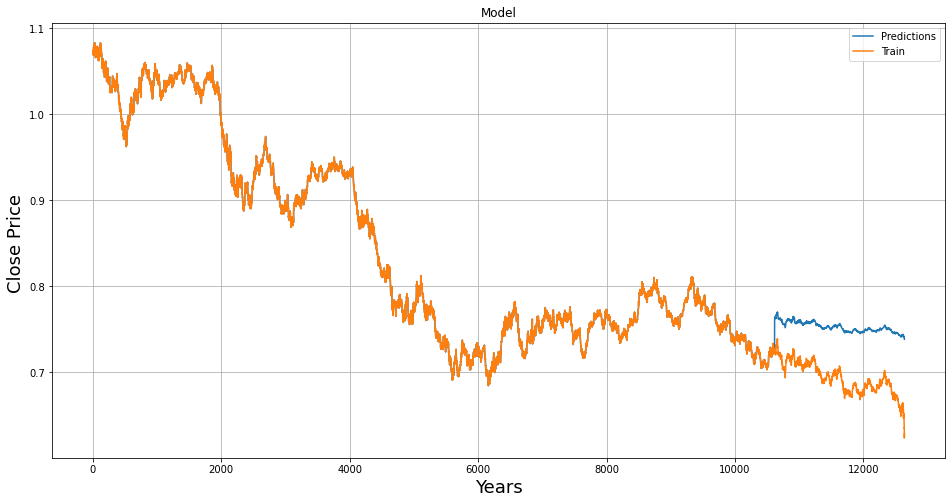

In [ ]:

for k in range(3):
  print('=============================================================================================================')
  print('{}- study Period And Data'.format(k+1))

  study_period=(AUDUSD.loc[all_study_period[k]])
  print(study_period)

  study_period.reset_index(inplace = True, drop = True) 

  data=study_period

  print('\n','Processing data........................................................','\n')

  data.drop(["Time (UTC)"],axis=1,inplace=True)
  data.drop(['Volume '],axis=1,inplace=True)

  col_name='Close'
  last_col = data.pop(col_name)
  data.insert(3, col_name, last_col)

  cols=[]
  rows=[]

  for i in range(data.shape[1]):
      for j in range(data.shape[0]):
          rows.append(data[data.columns[i]][j])
      cols.append(rows)
      rows=[]
      
  print(np.array(cols).T)


  # choose a number of time steps
  n_steps = 3

  print('\n','Data processing completed.........................................','\n')
  # convert into input/output
  data_X, data_y = split_sequences(np.array(cols).T, n_steps)

  # the dataset knows the number of features, e.g. 2
  n_features = data_X.shape[2]
  n_features

  #Splitting the dataset into train and test
  print('\n','Splitting dataset into train test and validation............................','\n')

  train_size=int(data_X.shape[0]*0.75)
  val_size=int(data_X.shape[0]*0.09)+train_size

  test_size=data_X.shape[0]-(val_size)

  val_x=data_X[train_size:val_size,]
  val_y=data_y[train_size:val_size,]

  print('Train size=',train_size)
  print('Test size=',test_size)

  train_X=data_X[0:train_size,]

  train_y=data_y[0:train_size,]

  print('Train_X data=','\n',train_X[0:10],'\n'
        '-----------------------------------------------------------------------'
        '\n','Train_y data=','\n',train_y[0:10])

  test_X=data_X[val_size:data_X.shape[0],]

  test_y=data_y[val_size:data_y.shape[0],]

  print('Test_X','\n',test_X,'\n',
      '------------------------------------------------------------------------------',
      '\n','Test_y','\n',test_y)
  
  print('\n','Splitting done..............................................','\n')

  print('\n','Running author model.............................................','\n')


  import tensorflow as tf
  from tensorflow.keras.models import Model
  from tensorflow.keras.layers import LSTM,Dense,TimeDistributed,Input,RepeatVector

  

  
  higher_empty_model[k]=model1(16,time_steps)     
  
  #Here we can try different model like 
  #1.model1(50,time_steps)   #units=16 also can keep becuse it is from our research paper
  #2.model2(50,time_steps)   #units=50
  
  higher_empty_model[k].summary()

  higher_empty_model[k].compile(loss='mse',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001))
  higher_empty_model[k].fit(train_X,train_y,validation_data=(val_x,val_y),batch_size=30,epochs=10)


  print('\n','Calculating RMSE value..........................','\n')

  #Calculate/Get the value of RMSE
  rmse=np.sqrt(np.mean(((higher_empty_model[k].predict(test_X)- test_y)**2)))
  rmse
  print('\n','RMSE=',rmse,'\n')

  print('\n','Plotting graph.................................','\n')

  #Plot/Create the data for the graph
  train = data_y.copy()
  train[val_size:data_y.shape[0],]=higher_empty_model[k].predict(test_X).ravel()
  plt.figure(figsize=(16,8))

  plt.title('Model')
  plt.xlabel('Years', fontsize=18)
  plt.ylabel('Close Price ', fontsize=18)
  plt.plot(train)
  plt.plot(data_y)
  plt.legend(['Predictions','Train'], loc='upper right')
  plt.grid()
  plt.show()


Here we have available model from different training set. By looking graph it give some ideas about which model may be best to select.

In [ ]:
higher_empty_model

Now we will select best model and use method of transfer learninig.

In [ ]:
higher_empty_model[2].save('my_model.h5')                        #Here I slelect last model i.e. 2
load_model2=tf.keras.models.load_model('my_model.h5')

**Now our model weight is ready to use on different dataset**

Testing model on different dataset having same type

In [ ]:
upload1=files.upload()

Saving EURUSD.csv to EURUSD.csv


In [ ]:
data1=pd.read_csv('/content/EURUSD.csv')

data1.drop(["Time (UTC)"],axis=1,inplace=True)
data1.drop(['Volume '],axis=1,inplace=True)

cols=[]
rows=[]

for i in range(data1.shape[1]):
    for j in range(data1.shape[0]):
        rows.append(data1[data1.columns[i]][j])
    cols.append(rows)
    rows=[]
    
print(np.array(cols).T)

#Splitting the dataset into train and test

train_size1=int(data_X.shape[0]*0.8)

test_size1=data_X.shape[0]-train_size1

print('Train size1=',train_size1)
print('Test size1=',test_size1)

train_X1=data_X[0:train_size1,]

train_y1=data_y[0:train_size1,]

test_X1=data_X[train_size1:data_X.shape[0],]

test_y1=data_y[train_size1:data_y.shape[0],]



[[1.43295 1.43317 1.43188 1.43311]
 [1.43293 1.43353 1.43226 1.43331]
 [1.43328 1.4336  1.43213 1.43341]
 ...
 [1.1216  1.12538 1.10551 1.11465]
 [1.11464 1.12269 1.11446 1.11864]
 [1.11881 1.12083 1.11527 1.11672]]
Train size1= 10112
Test size1= 2528


In [ ]:
prediction1=load_model2.predict(train_X1)
prediction1

array([[0.9736936 ],
       [0.97389936],
       [0.97422856],
       ...,
       [0.7699822 ],
       [0.77018195],
       [0.7701762 ]], dtype=float32)

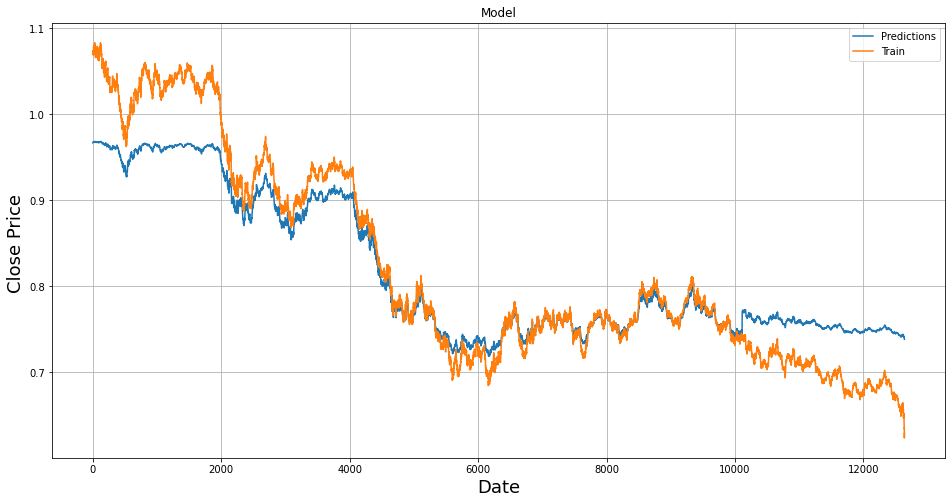

In [ ]:
#Plot/Create the data for the graph
train1 = data_y.copy()
train1[train_size1:data_y.shape[0],]=load_model2.predict(test_X1).ravel()
train1[0:train_size1,]=load_model1.predict(train_X1).ravel()
plt.figure(figsize=(16,8))

plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train1)
plt.plot(data_y)
plt.legend(['Predictions','Train'], loc='upper right')
plt.grid()
plt.show()

Let's zoom on performance over test data:

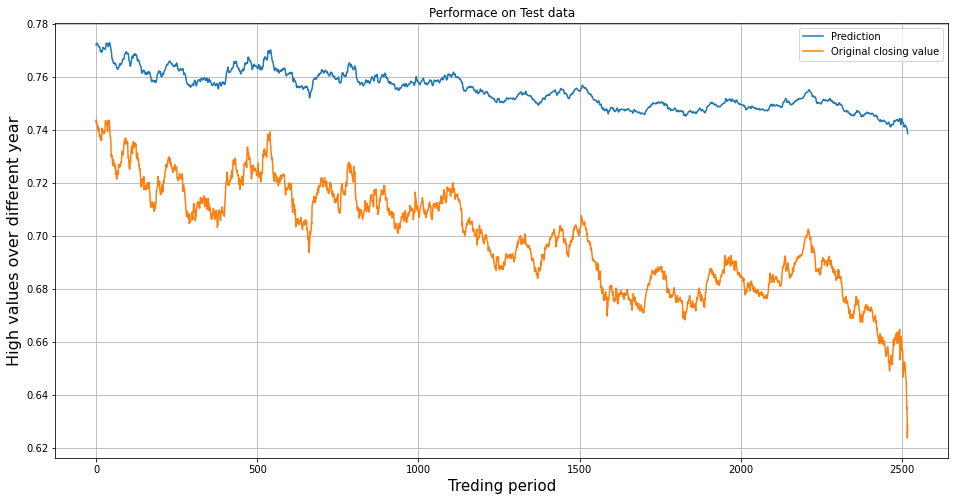

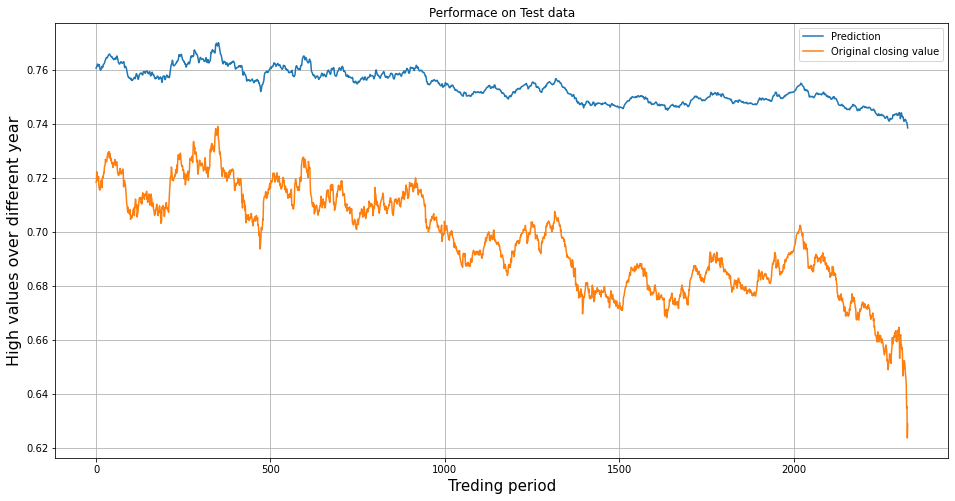

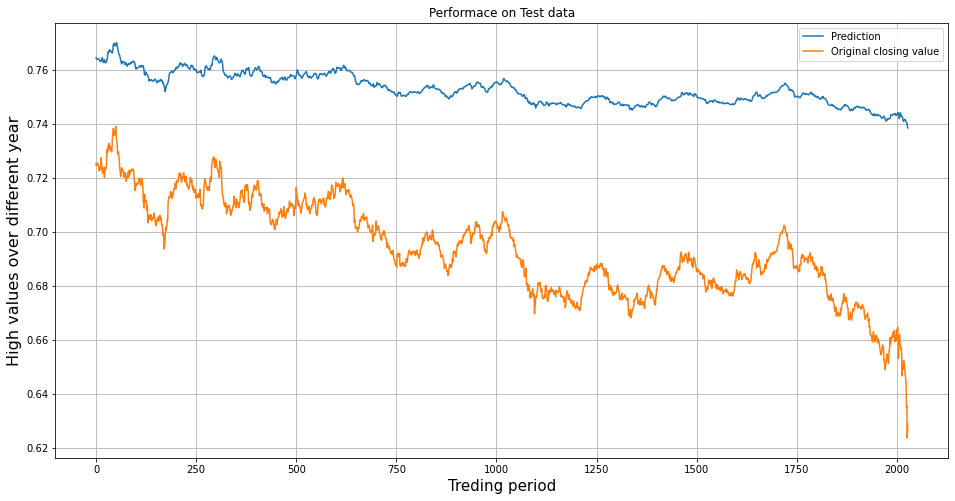

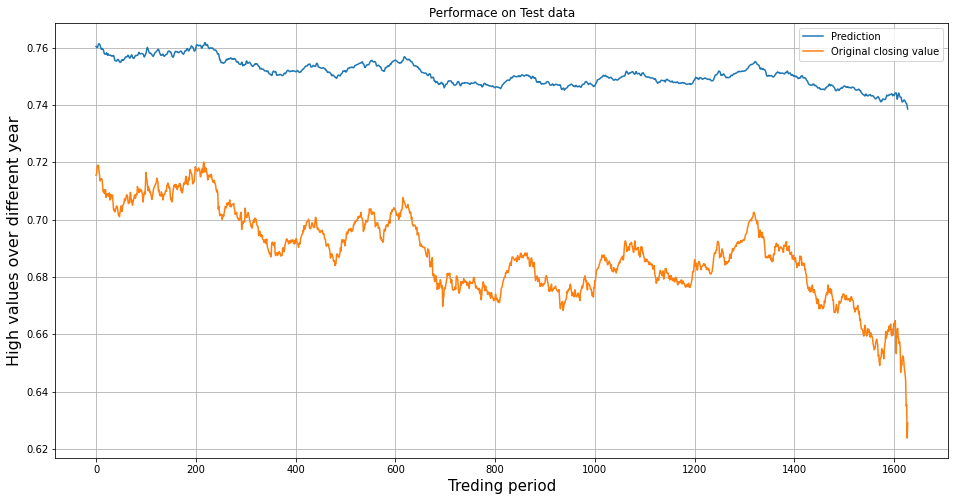

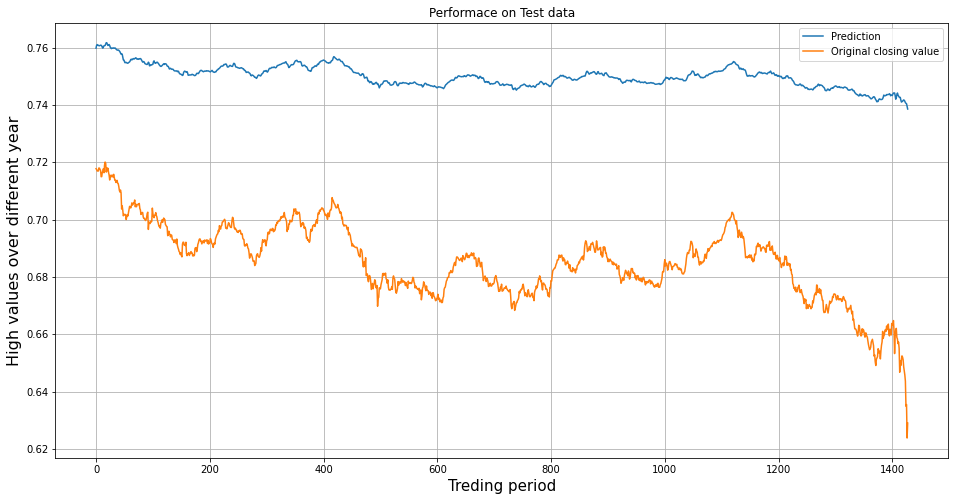

In [ ]:
for i in [10,200,500,900,1100]:
    plt.figure(figsize=(16,8))
    plt.plot(train1[train_size1+i:len(data_y)])
    plt.plot(data_y[train_size1+i:len(data_y)])
    plt.title('Performace on Test data')
    plt.xlabel('Treding period',fontsize=15)
    plt.ylabel('High values over different year',fontsize=16)
    plt.grid()
    plt.legend(['Prediction','Original closing value'])
    plt.show()



#By making little  changes. This  time we will chooses  different model.

1- study Period And Data
                Time (UTC)     Open     High      Low    Close   Volume 
0      2010.01.01 02:00:00  0.89748  0.89759  0.89741  0.89747   7951.85
1      2010.01.01 06:00:00  0.89747  0.89763  0.89739  0.89754  18505.45
2      2010.01.01 10:00:00  0.89755  0.89763  0.89746  0.89750  15265.53
3      2010.01.01 14:00:00  0.89753  0.89769  0.89746  0.89753  16587.97
4      2010.01.01 18:00:00  0.89755  0.89765  0.89738  0.89738   7615.19
...                    ...      ...      ...      ...      ...       ...
12474  2017.12.29 02:00:00  0.77942  0.78037  0.77906  0.78037   7490.80
12475  2017.12.29 06:00:00  0.78034  0.78146  0.77890  0.78139  13573.86
12476  2017.12.29 10:00:00  0.78138  0.78253  0.78086  0.78100  11050.28
12477  2017.12.29 14:00:00  0.78098  0.78252  0.78066  0.78125  15078.95
12478  2017.12.29 18:00:00  0.78124  0.78208  0.78002  0.78208   9624.06

[12479 rows x 6 columns]

 Processing data........................................................

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[0.89748 0.89759 0.89741 0.89747]
 [0.89747 0.89763 0.89739 0.89754]
 [0.89755 0.89763 0.89746 0.8975 ]
 ...
 [0.78138 0.78253 0.78086 0.781  ]
 [0.78098 0.78252 0.78066 0.78125]
 [0.78124 0.78208 0.78002 0.78208]]

 Data processing completed......................................... 


 Splitting dataset into train test and validation............................ 

Train size= 9357
Test size= 1998
Train_X data= 
 [[[0.89748 0.89759 0.89741]
  [0.89747 0.89763 0.89739]
  [0.89755 0.89763 0.89746]]

 [[0.89747 0.89763 0.89739]
  [0.89755 0.89763 0.89746]
  [0.89753 0.89769 0.89746]]

 [[0.89755 0.89763 0.89746]
  [0.89753 0.89769 0.89746]
  [0.89755 0.89765 0.89738]]

 [[0.89753 0.89769 0.89746]
  [0.89755 0.89765 0.89738]
  [0.89847 0.90001 0.89397]]

 [[0.89755 0.89765 0.89738]
  [0.89847 0.90001 0.89397]
  [0.8952  0.89864 0.89504]]

 [[0.89847 0.90001 0.89397]
  [0.8952  0.89864 0.89504]
  [0.89789 0.90562 0.89687]]

 [[0.8952  0.89864 0.89504]
  [0.89789 0.90562 0.89687]
  [0.90554 

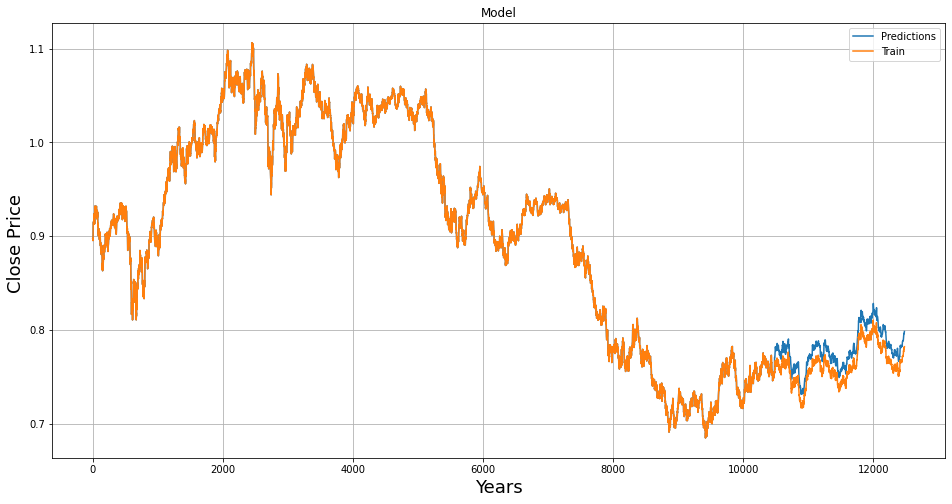

2- study Period And Data
                Time (UTC)     Open     High      Low    Close     Volume 
1565   2011.01.02 22:00:00  1.02070  1.02267  1.01812  1.01833   9060.8653
1566   2011.01.03 02:00:00  1.01833  1.02115  1.01827  1.02066   6375.1839
1567   2011.01.03 06:00:00  1.02068  1.02122  1.01865  1.01981  11705.1417
1568   2011.01.03 10:00:00  1.01981  1.02136  1.01794  1.01822  11618.2350
1569   2011.01.03 14:00:00  1.01818  1.02119  1.01744  1.02057  20359.2400
...                    ...      ...      ...      ...      ...         ...
14031  2018.12.31 02:00:00  0.70527  0.70681  0.70509  0.70593  17859.0200
14032  2018.12.31 06:00:00  0.70595  0.70721  0.70575  0.70614  18597.6800
14033  2018.12.31 10:00:00  0.70614  0.70663  0.70470  0.70497  17829.9700
14034  2018.12.31 14:00:00  0.70496  0.70569  0.70334  0.70437  27766.4900
14035  2018.12.31 18:00:00  0.70436  0.70628  0.70409  0.70534  11124.5200

[12471 rows x 6 columns]

 Processing data................................

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[1.0207  1.02267 1.01812 1.01833]
 [1.01833 1.02115 1.01827 1.02066]
 [1.02068 1.02122 1.01865 1.01981]
 ...
 [0.70614 0.70663 0.7047  0.70497]
 [0.70496 0.70569 0.70334 0.70437]
 [0.70436 0.70628 0.70409 0.70534]]

 Data processing completed......................................... 


 Splitting dataset into train test and validation............................ 

Train size= 9351
Test size= 1996
Train_X data= 
 [[[1.0207  1.02267 1.01812]
  [1.01833 1.02115 1.01827]
  [1.02068 1.02122 1.01865]]

 [[1.01833 1.02115 1.01827]
  [1.02068 1.02122 1.01865]
  [1.01981 1.02136 1.01794]]

 [[1.02068 1.02122 1.01865]
  [1.01981 1.02136 1.01794]
  [1.01818 1.02119 1.01744]]

 [[1.01981 1.02136 1.01794]
  [1.01818 1.02119 1.01744]
  [1.02056 1.02089 1.01582]]

 [[1.01818 1.02119 1.01744]
  [1.02056 1.02089 1.01582]
  [1.01687 1.01716 1.01242]]

 [[1.02056 1.02089 1.01582]
  [1.01687 1.01716 1.01242]
  [1.01363 1.01496 1.0092 ]]

 [[1.01687 1.01716 1.01242]
  [1.01363 1.01496 1.0092 ]
  [1.0099  

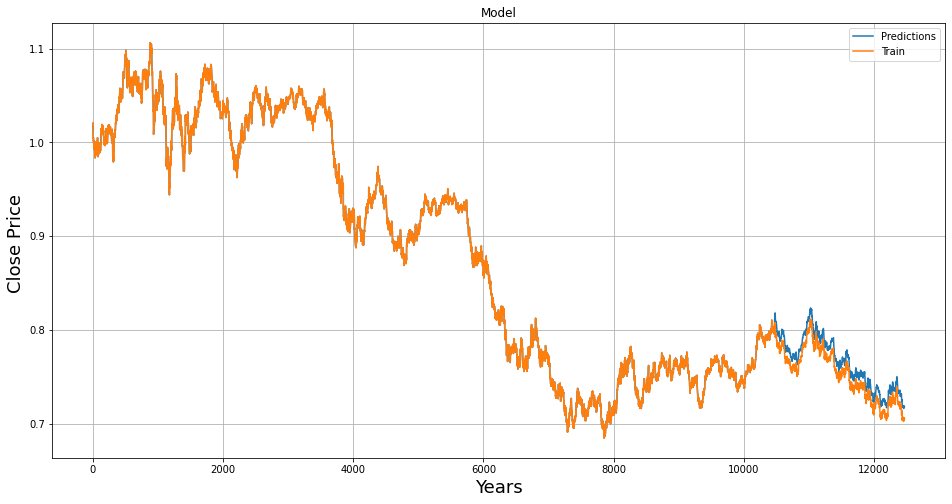

3- study Period And Data
                Time (UTC)     Open     High      Low    Close   Volume 
3258   2012.02.01 02:00:00  1.06262  1.06395  1.06030  1.06138  29121.76
3259   2012.02.01 06:00:00  1.06141  1.06821  1.05700  1.06765  46793.65
3260   2012.02.01 10:00:00  1.06761  1.07155  1.06589  1.07028  40606.21
3261   2012.02.01 14:00:00  1.07028  1.07409  1.07003  1.07218  52258.97
3262   2012.02.01 18:00:00  1.07218  1.07316  1.06942  1.07055  33528.10
...                    ...      ...      ...      ...      ...       ...
15895  2020.03.12 05:00:00  0.64578  0.64638  0.64352  0.64362  31186.71
15896  2020.03.12 09:00:00  0.64362  0.64365  0.63481  0.63487  36624.52
15897  2020.03.12 13:00:00  0.63487  0.63678  0.62669  0.63544  72771.41
15898  2020.03.12 17:00:00  0.63543  0.63866  0.62136  0.62377  55018.52
15899  2020.03.12 21:00:00  0.62378  0.63186  0.62336  0.62899  27747.49

[12642 rows x 6 columns]

 Processing data........................................................

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[1.06262 1.06395 1.0603  1.06138]
 [1.06141 1.06821 1.057   1.06765]
 [1.06761 1.07155 1.06589 1.07028]
 ...
 [0.63487 0.63678 0.62669 0.63544]
 [0.63543 0.63866 0.62136 0.62377]
 [0.62378 0.63186 0.62336 0.62899]]

 Data processing completed......................................... 


 Splitting dataset into train test and validation............................ 

Train size= 9480
Test size= 2023
Train_X data= 
 [[[1.06262 1.06395 1.0603 ]
  [1.06141 1.06821 1.057  ]
  [1.06761 1.07155 1.06589]]

 [[1.06141 1.06821 1.057  ]
  [1.06761 1.07155 1.06589]
  [1.07028 1.07409 1.07003]]

 [[1.06761 1.07155 1.06589]
  [1.07028 1.07409 1.07003]
  [1.07218 1.07316 1.06942]]

 [[1.07028 1.07409 1.07003]
  [1.07218 1.07316 1.06942]
  [1.07048 1.07572 1.07036]]

 [[1.07218 1.07316 1.06942]
  [1.07048 1.07572 1.07036]
  [1.07407 1.07429 1.07022]]

 [[1.07048 1.07572 1.07036]
  [1.07407 1.07429 1.07022]
  [1.07177 1.07425 1.0699 ]]

 [[1.07407 1.07429 1.07022]
  [1.07177 1.07425 1.0699 ]
  [1.07067 

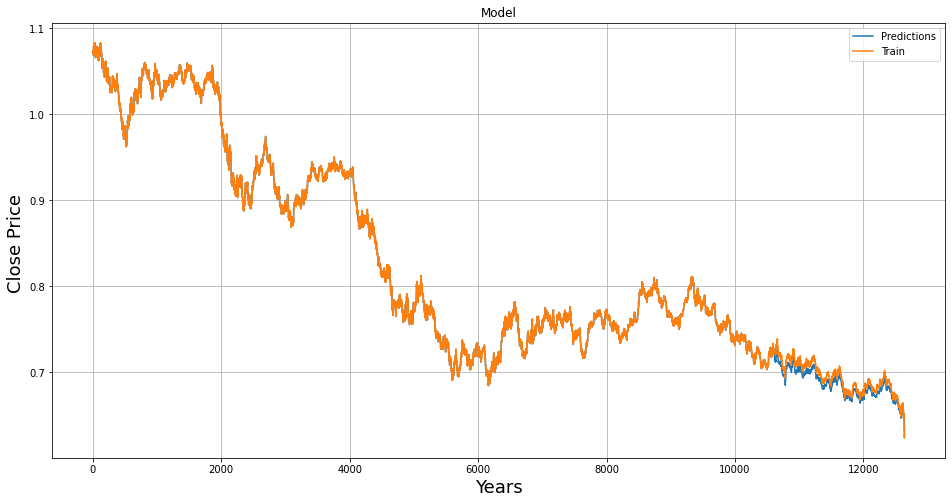

In [ ]:

for k in range(3):
  print('=============================================================================================================')
  print('{}- study Period And Data'.format(k+1))

  study_period=(AUDUSD.loc[all_study_period[k]])
  print(study_period)

  study_period.reset_index(inplace = True, drop = True) 

  data=study_period

  print('\n','Processing data........................................................','\n')

  data.drop(["Time (UTC)"],axis=1,inplace=True)
  data.drop(['Volume '],axis=1,inplace=True)

  col_name='Close'
  last_col = data.pop(col_name)
  data.insert(3, col_name, last_col)

  cols=[]
  rows=[]

  for i in range(data.shape[1]):
      for j in range(data.shape[0]):
          rows.append(data[data.columns[i]][j])
      cols.append(rows)
      rows=[]
      
  print(np.array(cols).T)


  # choose a number of time steps
  n_steps = 3

  print('\n','Data processing completed.........................................','\n')
  # convert into input/output
  data_X, data_y = split_sequences(np.array(cols).T, n_steps)

  # the dataset knows the number of features, e.g. 2
  n_features = data_X.shape[2]
  n_features

  #Splitting the dataset into train and test
  print('\n','Splitting dataset into train test and validation............................','\n')

  train_size=int(data_X.shape[0]*0.75)
  val_size=int(data_X.shape[0]*0.09)+train_size

  test_size=data_X.shape[0]-(val_size)

  val_x=data_X[train_size:val_size,]
  val_y=data_y[train_size:val_size,]

  print('Train size=',train_size)
  print('Test size=',test_size)

  train_X=data_X[0:train_size,]

  train_y=data_y[0:train_size,]

  print('Train_X data=','\n',train_X[0:10],'\n'
        '-----------------------------------------------------------------------'
        '\n','Train_y data=','\n',train_y[0:10])

  test_X=data_X[val_size:data_X.shape[0],]

  test_y=data_y[val_size:data_y.shape[0],]

  print('Test_X','\n',test_X,'\n',
      '------------------------------------------------------------------------------',
      '\n','Test_y','\n',test_y)
  
  print('\n','Splitting done..............................................','\n')

  print('\n','Running author model.............................................','\n')


  import tensorflow as tf
  from tensorflow.keras.models import Model
  from tensorflow.keras.layers import LSTM,Dense,TimeDistributed,Input,RepeatVector

  

  
  higher_empty_model[k]=model2(60,time_steps)     
  
  #Here we can try different model like 
  #1.model1(50,time_steps)   #units=16 also can keep becuse it is from our research paper
  #2.model2(50,time_steps)   #units=50
  
  higher_empty_model[k].summary()

  higher_empty_model[k].compile(loss='mse',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001))
  higher_empty_model[k].fit(train_X,train_y,validation_data=(val_x,val_y),batch_size=30,epochs=10)


  print('\n','Calculating RMSE value..........................','\n')

  #Calculate/Get the value of RMSE
  rmse=np.sqrt(np.mean(((higher_empty_model[k].predict(test_X)- test_y)**2)))
  rmse
  print('\n','RMSE=',rmse,'\n')

  print('\n','Plotting graph.................................','\n')

  #Plot/Create the data for the graph
  train = data_y.copy()
  train[val_size:data_y.shape[0],]=higher_empty_model[k].predict(test_X).ravel()
  plt.figure(figsize=(16,8))

  plt.title('Model')
  plt.xlabel('Years', fontsize=18)
  plt.ylabel('Close Price ', fontsize=18)
  plt.plot(train)
  plt.plot(data_y)
  plt.legend(['Predictions','Train'], loc='upper right')
  plt.grid()
  plt.show()


In [ ]:
higher_empty_model

Now we will select best model and use method of transfer learninig.

In [ ]:
higher_empty_model[2].save('my_model.h5')                        #Here I slelect last model i.e. 2
load_model2=tf.keras.models.load_model('my_model.h5')

**Now our model weight is ready to use on different dataset**

Testing model on different dataset having same type

In [ ]:
#upload1=files.upload()

In [ ]:
data1=pd.read_csv('/content/EURUSD.csv')

data1.drop(["Time (UTC)"],axis=1,inplace=True)
data1.drop(['Volume '],axis=1,inplace=True)

cols=[]
rows=[]

for i in range(data1.shape[1]):
    for j in range(data1.shape[0]):
        rows.append(data1[data1.columns[i]][j])
    cols.append(rows)
    rows=[]
    
print(np.array(cols).T)

#Splitting the dataset into train and test

train_size1=int(data_X.shape[0]*0.8)

test_size1=data_X.shape[0]-train_size1

print('Train size1=',train_size1)
print('Test size1=',test_size1)

train_X1=data_X[0:train_size1,]

train_y1=data_y[0:train_size1,]

test_X1=data_X[train_size1:data_X.shape[0],]

test_y1=data_y[train_size1:data_y.shape[0],]



[[1.43295 1.43317 1.43188 1.43311]
 [1.43293 1.43353 1.43226 1.43331]
 [1.43328 1.4336  1.43213 1.43341]
 ...
 [1.1216  1.12538 1.10551 1.11465]
 [1.11464 1.12269 1.11446 1.11864]
 [1.11881 1.12083 1.11527 1.11672]]
Train size1= 10112
Test size1= 2528


In [ ]:
prediction1=load_model2.predict(test_X1)
prediction1

array([[0.7279446 ],
       [0.72876644],
       [0.7288117 ],
       ...,
       [0.6395838 ],
       [0.6352663 ],
       [0.6312653 ]], dtype=float32)

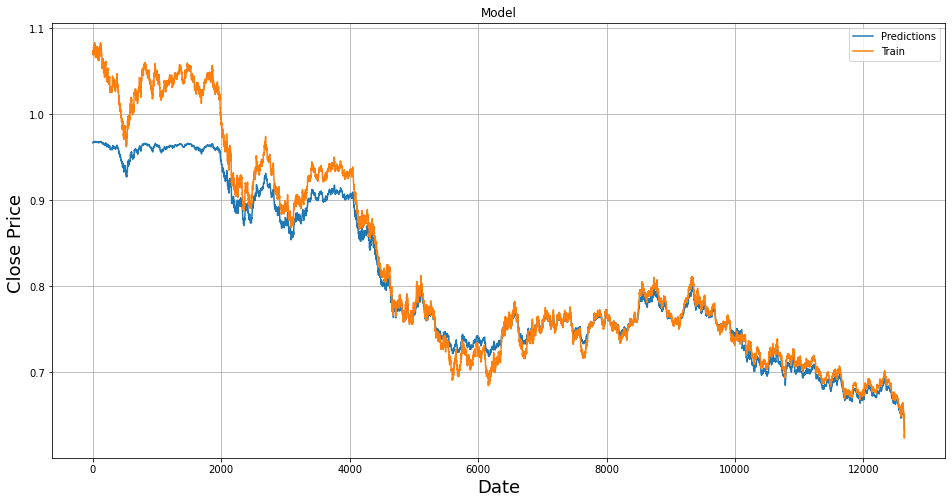

In [ ]:
#Plot/Create the data for the graph
train1 = data_y.copy()
train1[train_size1:data_y.shape[0],]=load_model2.predict(test_X1).ravel()
train1[0:train_size1,]=load_model1.predict(train_X1).ravel()
plt.figure(figsize=(16,8))

plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train1)
plt.plot(data_y)
plt.legend(['Predictions','Train'], loc='upper right')
plt.grid()
plt.show()

Let's zoom on performance over test data:

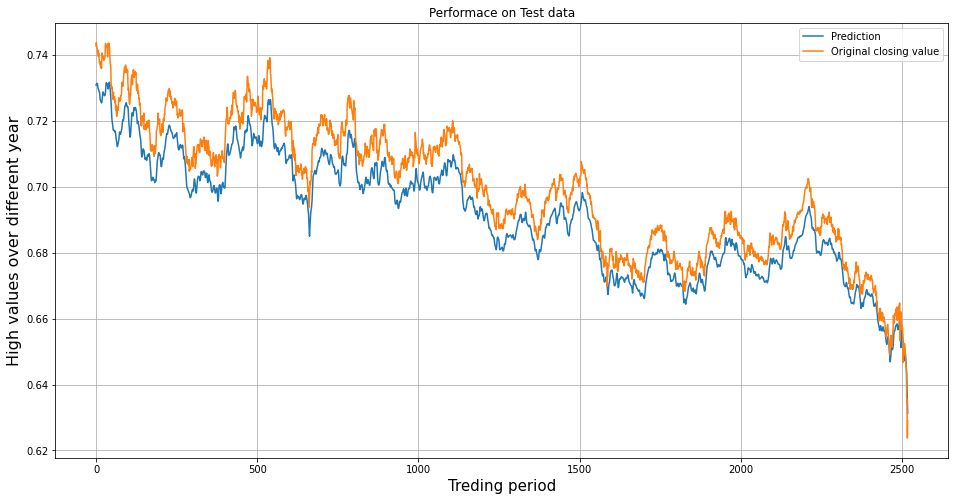

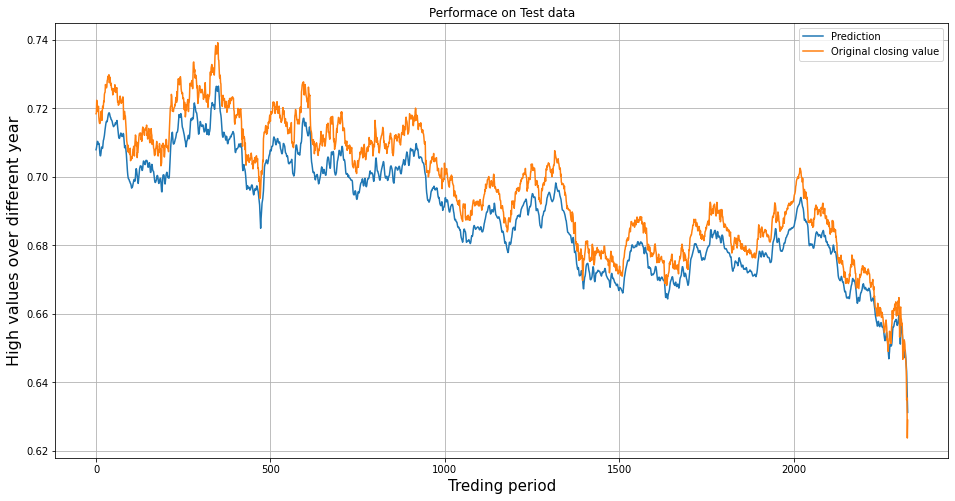

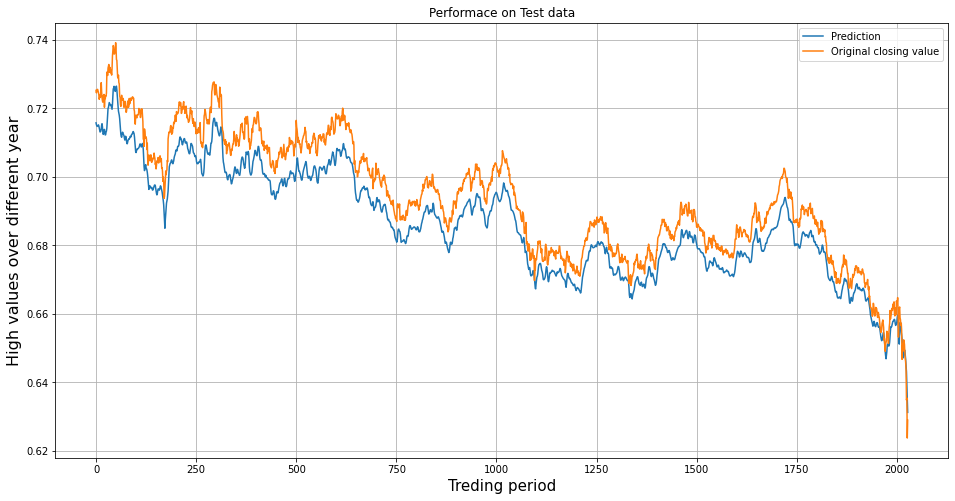

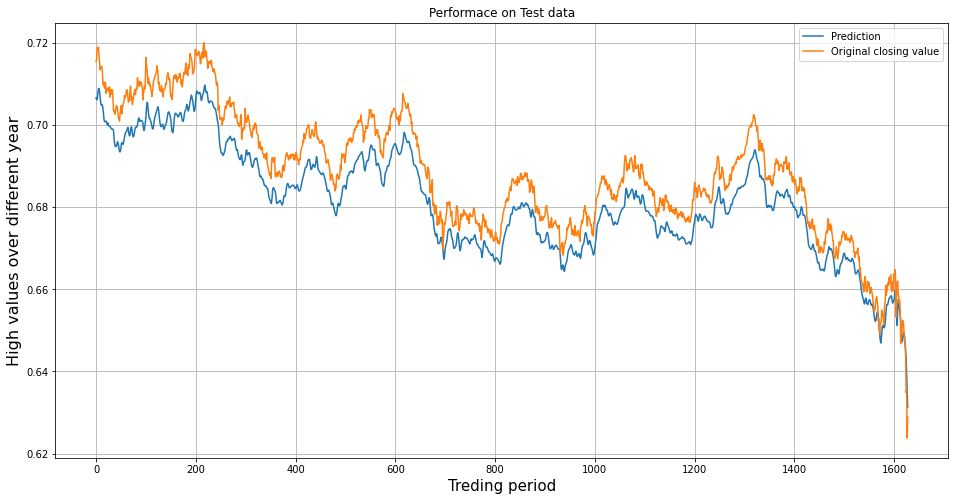

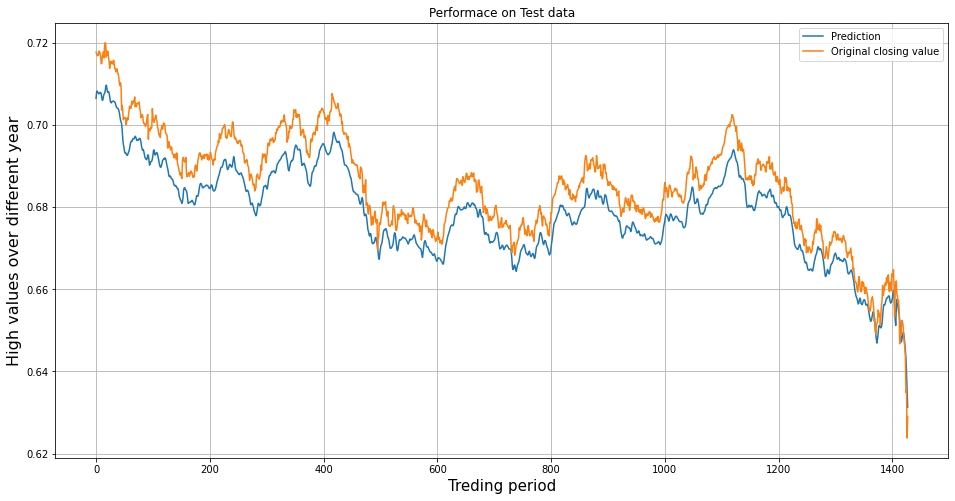

In [ ]:
for i in [10,200,500,900,1100]:
    plt.figure(figsize=(16,8))
    plt.plot(train1[train_size1+i:len(data_y)])
    plt.plot(data_y[train_size1+i:len(data_y)])
    plt.title('Performace on all data points')
    plt.xlabel('Treding period',fontsize=15)
    plt.ylabel('Close values over different year',fontsize=16)
    plt.grid()
    plt.legend(['Prediction','Original closing value'])
    plt.show()



As we can see it is quite good . Author used different Machine Learning  algorithm but I stopped here myself only Deep Learning.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100


RMSE=np.sqrt(np.mean(((prediction1- test_y1)**2)))

SMAPE=(np.sum(2*np.abs(prediction1- test_y1)/((np.abs(prediction1)+ np.abs(test_y1))))*100)/len(test_y1)


print('MSE:',mean_squared_error(prediction1,test_y1))
print('MAE:',mean_absolute_error(prediction1,test_y1))
print('RMSE:',RMSE)
print('SMAPE:',SMAPE)
print('MAPE:',mape(test_y1,prediction1 ))


MSE: 6.702437366763415e-05
MAE: 0.007830616020167932
RMSE: 0.028104331648501284
SMAPE: 8268.094876474743
MAPE: 3.2384047255443567
